In [123]:
using PyPlot,JLD2,LsqFit

Using $\sqrt{e} \cos{\omega}$ and $\sqrt{e} \sin{\omega}$ as priors, doesnt work properly. don't know why. Reverted to previous prior $e \cos{\omega}$ and $e \sin{\omega}$

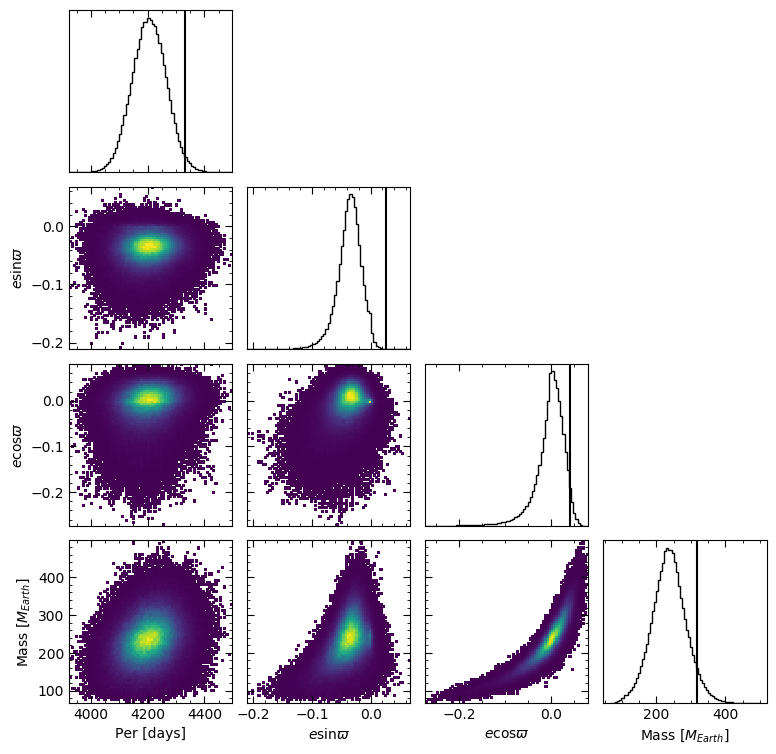

In [31]:
include("corner_plot.jl")
# if String(sim)=="EMB"
mcfile = string("MCMC/fromEMB/p3_mcmc30.0s30.0yrs.jld2")
# else
# mcfile = string("MCMC/",model,"_mcmc",sigma,"s",nyear,"yrs.jld2")
# end
m = jldopen(String(mcfile),"r")
par_mcmc= m["par_mcmc"]
lprob_mcmc = m["lprob_mcmc"]
nwalkers = m["nwalkers"]
nsteps = m["nsteps"]
accept = m["accept"]
iburn = m["iburn"]
indepsamples = m["indepsamples"]
# True values based on "PlanetaryBodyData.pdf" (source?)
offset = 0.0
x1=vec(par_mcmc[:,iburn:nsteps,11]).* CGS.MSUN/CGS.MEARTH
x2=vec(par_mcmc[:,iburn:nsteps,14])#.*sqrt.(vec(par_mcmc[:,1:nsteps,14]).^2 .+ vec(par_mcmc[:,1:nsteps,15]).^2)
x3=vec(par_mcmc[:,iburn:nsteps,15])#.*sqrt.(vec(par_mcmc[:,1:nsteps,14]).^2 .+ vec(par_mcmc[:,1:nsteps,15]).^2)
x4=vec(par_mcmc[:,iburn:nsteps,12])
truex1=318
truex2=calc_evec1(0.048,14.75)
truex3=calc_evec2(0.048,14.75)
truex4=4332.82012875
lim=minimum(x4),maximum(x4)
label="Per [days]"
corner(x1,x2,x3,x4,truex1,truex2,truex3,truex4,75,lim,label)

In [ ]:
include("plot_emcee.jl")
plot_emcee(30.0,30.0,"jupiter",false)

## Posterior Distributions

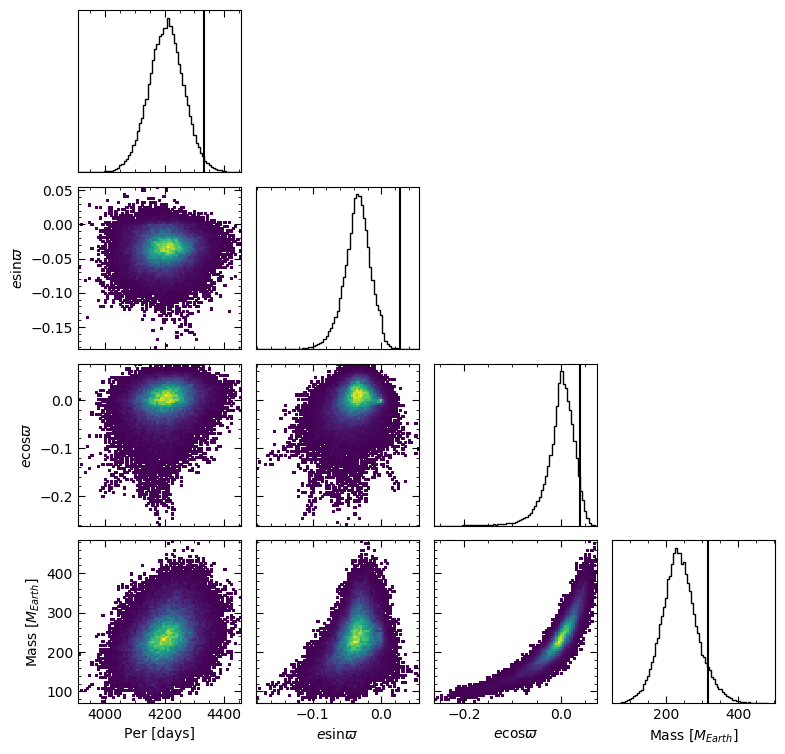

P_mean= 4204.298420096252
0.04010139295881334 <- ecosω & esinω -> 0.026379504975697257


In [245]:
corner_planet(p_mc33,75,"jupiter")

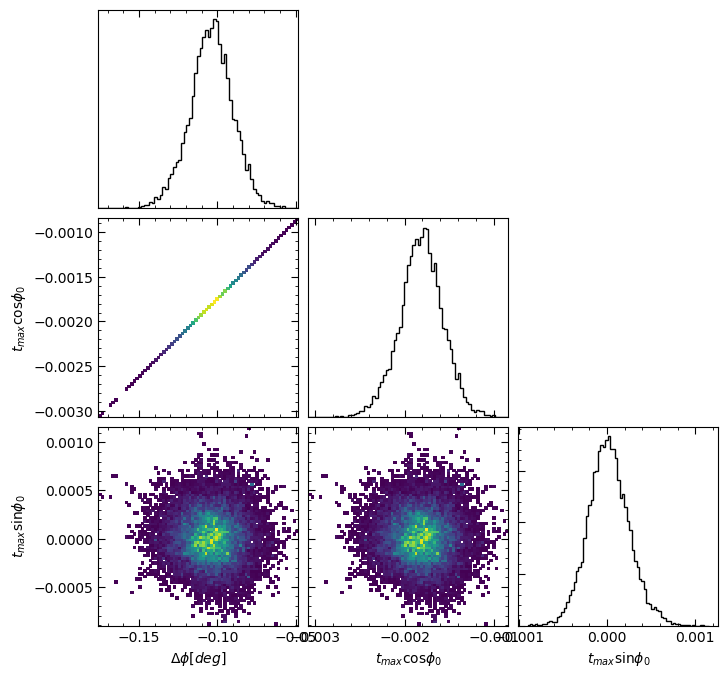

In [246]:
corner_moon(m_mc33,75)

Using original prior on eccentricity.

In [108]:
tt,tt0,sigtt,ttmodel = g["tt"],g["tt0"],g["sigtt"],g["ttmodel"]
pbest_global = g["pbest_global"]
nplanet,ntrans = g["nplanet"],g["ntrans"]
pair_ttvs = decompose_ttvs(nplanet,ntrans,pbest_global) .* (24 * 60)
n1,n2,n3 = ntrans
mu1,P1,t01,ecosw1,esinw1 = pbest_global[1:5]
mu2,P2,t02,ecosw2,esinw2 = pbest_global[6:10]
mu3,P3,t03,ecosw3,esinw3 = pbest_global[11:15]
time1 = collect(t01 .+ range(0,stop=n1-1,length=n1) .* P1)
time2 = collect(t02 .+ range(0,stop=n2-1,length=n2) .* P2)
tt1 = tt[1:n1]
tt2 = tt[n1+1:n1+n2];

In [194]:
calc_rad(value) = value * pi/180
calc_deg(value) = value * 180/pi
calc_omega(pomega,Omega) = pomega - Omega
function calc_L(t,t0,P,esinw)
    lambda = (360/P .* (t.-t0)) .+ 2*esinw
    return lambda
end

calc_L (generic function with 1 method)

In [197]:
(J2000-t01)/P1 , (J2000-t02)/P2 , (J2000-t03)/P3

(80.29002775086454, 49.06304030994849, 1.8868486203603383)

In [195]:
calc_rad(80.29002775086454)

1.4013253407702035

$L \equiv \lambda$. Check to see if $\lambda_{E} \sim \lambda_{V}$ at their respective transit times. $\lambda mod 2 \pi = \lambda_{obs}$[what?] where $\lambda_{obs}$ is longitude that both Earth and Venus have.
true $\lambda$ from planet body data sheet: 181.9, 100, 34 degrees

In [117]:
J2000 = 2451545.0

w1 = calc_deg(atan(esinw1,ecosw1))
w2 = calc_deg(atan(esinw2,ecosw2))
w3 = calc_deg(atan(esinw3,ecosw3))
w1,w2,w3


(-2.9189684831965503, 9.176444742981595, -49.05234032359363)

In [174]:
L_1 = calc_L(tt1,t01,P1,esinw1)
L_2 = calc_L(tt2,t02,P2,esinw2)
# L_3 = calc_L(tt1,t03,P3,esinw3)
L_1,L_2

([-0.0024015066329488737, 359.9985750809026, 720.002237747706, 1079.9988220219257, 1439.9975087045038, 1800.0023024714983, 2160.003065197765, 2520.001219974129, 2879.99523518333, 3239.9960618528166  …  20159.996734479737, 20520.00259574987, 20880.004040825617, 21240.001734749592, 21599.99690140452, 21959.996235769864, 22320.003691815633, 22680.00261636066, 23039.998502659375, 23399.99704485963], [0.007723420943177829, 360.00448338910394, 720.0080964117075, 1080.0025614570113, 1440.0057495061735, 1800.0082994721358, 2160.0012984270165, 2520.0033907012057, 2880.0039854453016, 3240.001757352988  …  11160.001174038334, 11520.005288894095, 11880.00215863628, 12240.007783503548, 12600.006956778676, 12960.00540622818, 13320.008568061554, 13680.003907554395, 14040.00452694739, 14400.008357562872])

In [152]:
28904.409642330258-28722.430890811236

181.9787515190219

In [153]:
17662.6994287092-17562.229939921457

100.46948878774128

In [154]:
679.195296805864-644.8690628197218

34.326233986142256

Venus transit occurs 0.277 radians after it goes through periastron. Earth transit occurs -0.552 radians after it goes through periastron

In [115]:
L_1+w1,L_2+w2,L_3+w3

(-2.9193164641747487, 9.181361870724214, -728.3880501771732)

In [193]:
Dw1 = (((360/P1) .* (t01.- J2000)) .+ 181.97909950) + 360*80

77.56910918876383

In [192]:
Dw2 = ((360/P2) .* (t02 .- J2000) .+ 100.46457166) + 360*49.06304030994849

100.46457165999891

In [191]:
Dw3 = [(360/P3) .* (t03 .- J2000) .+ 34.39644051,(360/P3) .* (t03 .- J2000) .+ 34.39644051 + 360*1,(360/P3) .* (t03 .- J2000) .+ 34.39644051 + 360*2]

3-element Array{Float64,1}:
 -644.8690628197218 
 -284.86906281972176
   75.13093718027824

In [135]:
deltat_sar99(a_p,a_s,m_p,m_s,P_p) = (2*a_s*m_s*P_p) / (2*pi*a_p*m_p)

deltat_sar99 (generic function with 1 method)

In [136]:
deltat_sar99(1.49e8,3.84e5,5.97e24,734.8e20,365.256355)

0.003687972556145138

In [137]:
0.003687972556145138/(2*sqrt(2))

0.0013038952016400562

## Likelihoods And Probabilities

In [6]:
    include("TTVFaster/src/TTVFaster.jl")
    using Main.TTVFaster
import Main.TTVFaster.ttv_wrapper

In [7]:
function exam_fit(sigma,nyear)  
infile = string("FITS/fromEMB/p3_fit",sigma,"s",nyear,"yrs.jld2")
  m = jldopen(String(infile),"r")
tt0,tt,ttmodel,sigtt=m["tt0"],m["tt"],m["ttmodel"],m["sigtt"]
  nplanet,ntrans = m["nplanet"],m["ntrans"]
  nt1,nt2 = m["ntrans"][1],m["ntrans"][2]
  p3,lprob_p3=m["p3"],m["lprob_p3"]
  best_p3,lprob_best_p3=m["best_p3"],m["lprob_best_p3"]
  Nobs = sum([nt1,nt2])
  jmax=5
#   jd2 = nyear*365.25 + jd1
  weight = ones(nt1+nt2)./ sigtt.^2 #assigns each data point stat weight d.t. noise = 1/σ^2
  fit = curve_fit((tt0,params) -> ttv_wrapper(tt0,nplanet,ntrans,params,jmax,false),tt0,tt,weight,best_p3)
  best_p3 = fit.param
cov = estimate_covar(fit)
se = standard_error(fit)
return cov,se
end
exam_fit(30.0,30.0)

LinearAlgebra.SingularException: [91mLinearAlgebra.SingularException(1)[39m

In [28]:
wide_EMB = jldopen("FITS/fromEMB/p3_widefit30.0s30.0yrs.jld2","r")
grid_wide = (10 .^ range(log10(wide_EMB["p3in"]),stop=log10(wide_EMB["p3out"]),length=wide_EMB["np3"])) ./365.25
lprob_wide = exp.((wide_EMB["lprob_p3"] .-maximum(wide_EMB["lprob_p3"])))
pbest_global_wide = wide_EMB["pbest_global"]

15-element Array{Float64,1}:
    2.542060938894428e-6 
  224.70078014751826     
    2.4335037653473243e6 
   -0.002658390717242162 
    0.007085553141872685 
    3.0254602933672823e-6
  365.2564540213358      
    2.433624402170656e6  
    0.012039815941107994 
    0.008310511609352067 
    0.000771633701052382 
 4210.047744735873       
    2.4390240513944956e6 
    0.016250528671481097 
   -0.0424903497339783   

In [32]:
f =jldopen("FITS/fromEMB/p3_fit30.0s20.0yrs.jld2","r")
xgrid = (10 .^ range(log10(f["p3in"]),stop=log10(f["p3out"]),length=f["np3"])) ./365.25
xprob = exp.((f["lprob_p3"] .-maximum(f["lprob_p3"])))
best_global = f["best_p3"]

15-element Array{Float64,1}:
    2.3785594711271752e-6
  224.70078376151974     
    2.433503765311656e6  
    0.00601901410524697  
    0.01502278187589552  
    2.9937456370907186e-6
  365.25641496374135     
    2.4336244027063358e6 
    0.017922946536455348 
    0.013077850417342345 
    0.0008496106286596368
 4497.628438598749       
    2.439091239755678e6  
    0.028357488794318066 
   -0.04970254629706098  

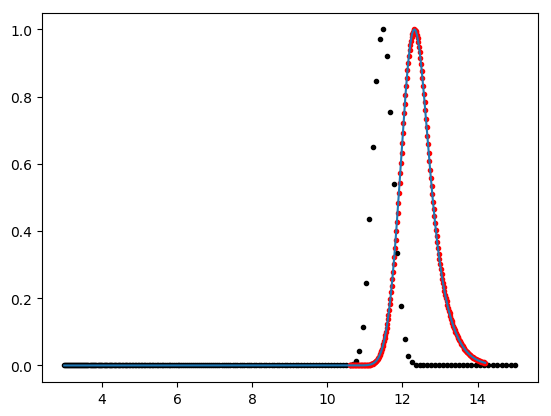

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x145855e10>

In [33]:
plot(grid_wide,lprob_wide,".",color="black")
plot(xgrid,xprob,".",color="red")
grid = [grid_wide[1:80];xgrid]
prob = [lprob_wide[1:80];xprob]
plot(grid,prob)

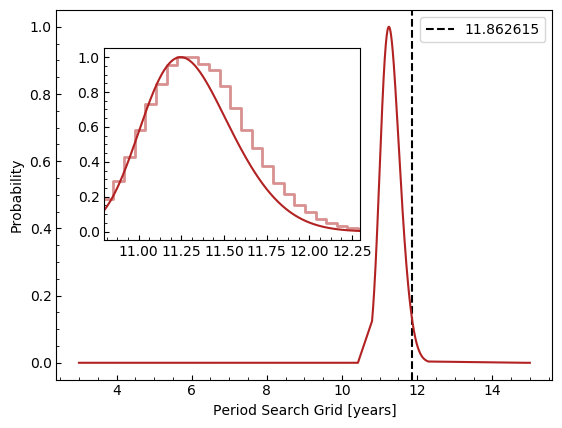

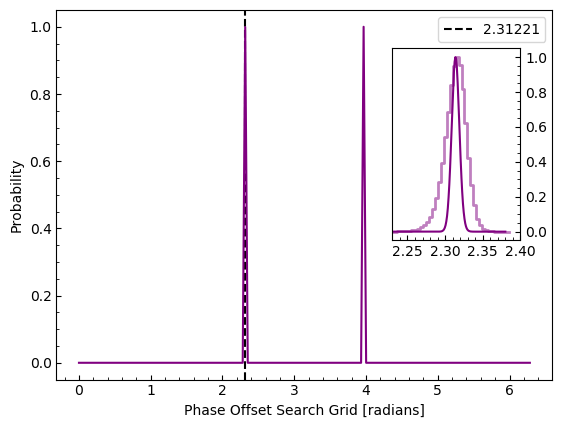

Simulated with σ= 60.0 second noise, for 30.0 observation years.


In [94]:
include("plot_likelihood.jl")
plot_likelihood(60.0,30.0,50,true)

In [108]:
include("corner_plot.jl")
sigs=[10.0,30.0,60.0,90.0]
years=[30.0,25.0,20.0,15.0]
for i=1:length(sigs)
    for j=1:length(years)
# corner_plot(sigs[i],years[j],"no","moon",50)
    end
end

MCMC file for EMB with p4 model at 10.0 secs and 20.0 yrs doesn't exist!!!!


MCMC file for EMB with p4 model at 30.0 secs and 20.0 yrs doesn't exist!!!!
MCMC file for EMB with p4 model at 30.0 secs and 15.0 yrs doesn't exist!!!!
MCMC file for EMB with p4 model at 60.0 secs and 25.0 yrs doesn't exist!!!!
MCMC file for EMB with p4 model at 60.0 secs and 20.0 yrs doesn't exist!!!!
MCMC file for EMB with p4 model at 90.0 secs and 30.0 yrs doesn't exist!!!!
MCMC file for EMB with p4 model at 90.0 secs and 25.0 yrs doesn't exist!!!!
MCMC file for EMB with p4 model at 90.0 secs and 20.0 yrs doesn't exist!!!!
MCMC file for EMB with p4 model at 90.0 secs and 15.0 yrs doesn't exist!!!!


In [128]:
include("plot_emcee.jl")
sigs=[10.0,30.0,60.0,90.0]
years=[30.0,25.0,20.0,15.0]
for i=1:length(sigs)
    for j=1:length(years)
plot_emcee(sigs[i],years[j],"no","moon",true)
    end
end


jupiter period agreement --> unique solution & not degenerate

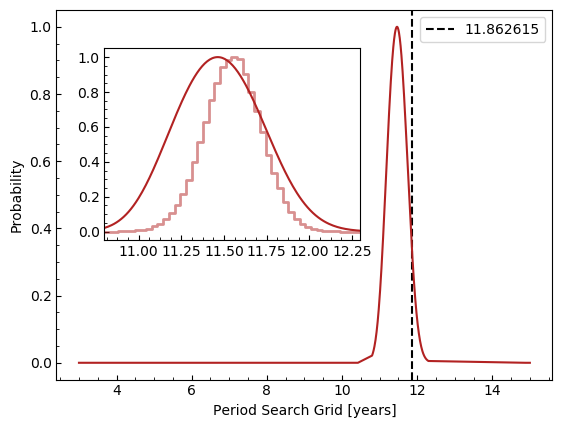

In [165]:
include("plot_likelihood.jl")
plot_likelihood(30.0,30.0,"no","moon",50)

In [16]:
p_33 = jldopen("FITS/p3_fit30.0s30.0yrs.jld2","r")
p_mc33 = jldopen("MCMC/p3_mcmc30.0s30.0yrs.jld2","r")
m_33 = jldopen("FITS/moon_fit30.0s30.0yrs.jld2","r")
m_mc33 = jldopen("MCMC/moon_mcmc30.0s30.0yrs.jld2","r");

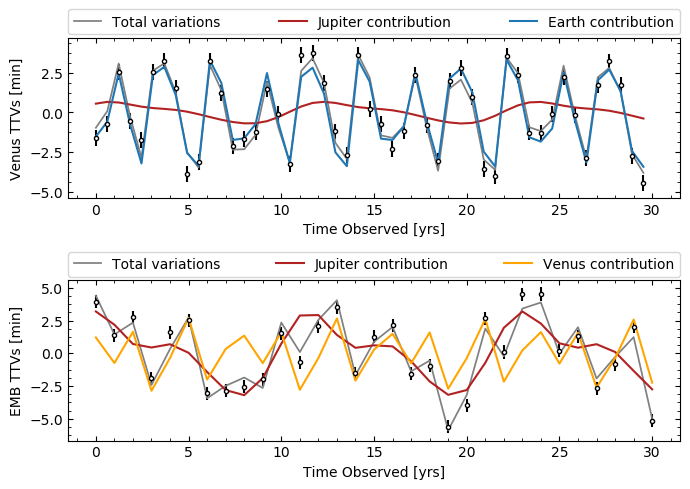

Simulated with σ= 30.0 second noise


In [17]:
include("plot_ttvs.jl")
plot_ttvs(p_33,false)
# savefig("IMAGES/EMBttvs.eps")

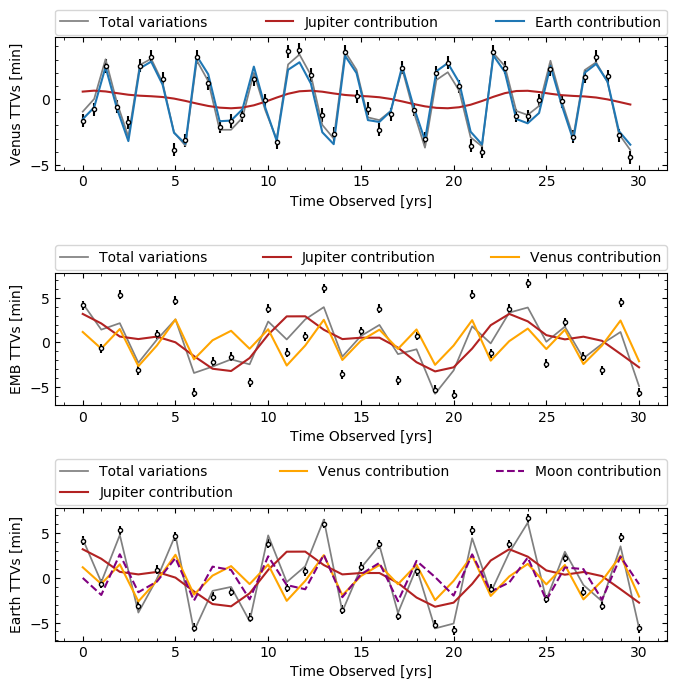

Simulated with σ= 30.0 second noise


In [248]:
include("plot_ttvs.jl")
plot_ttvs(m_33,true)

In [4]:
p433=jldopen("FITS/p4_fit30.0s30.0yrs.jld2")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/p4_fit30.0s30.0yrs.jld2 (read-only)
 ├─🔢 pbest_p3
 ├─🔢 pbest
 ├─🔢 lprob_p3
 ├─🔢 lprob_p4
 ├─🔢 lprob_best
 ├─🔢 pbest_global
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 p4in
 ├─🔢 p4out
 └─🔢 np4

In [145]:
p4=jldopen("FITS/p4_fit10.0s15.0yrs.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/p4_fit10.0s15.0yrs.jld2 (read-only)
 ├─🔢 p3
 ├─🔢 lprob_p3
 ├─🔢 best_p3
 ├─🔢 lprob_best_p3
 ├─🔢 p4
 ├─🔢 lprob_p4
 ├─🔢 best_p4
 ├─🔢 lprob_best_p4
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 p4in
 ├─🔢 p4out
 └─🔢 np4

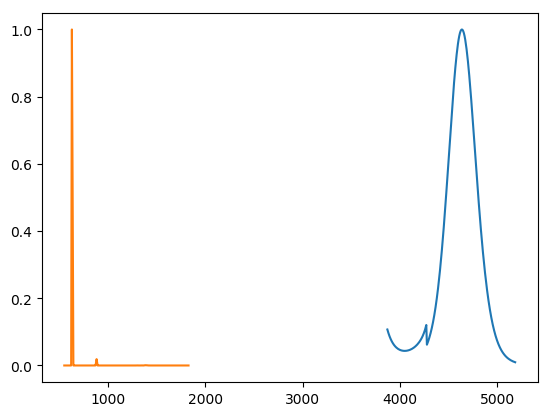

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x132166d30>

In [146]:
plot(p4["p3"],exp.(p4["lprob_p3"].-maximum(p4["lprob_p3"])))
plot(p4["p4"],exp.(p4["lprob_p4"].-maximum(p4["lprob_p4"])))

In [ ]:
chi2_p2,chi2_p3,chi2_m,chi2_p4=2897,394,284,88

In [148]:
p4["best_p4"]

20-element Array{Float64,1}:
    4.444359397461317e-6 
  224.70076495132957     
    2.4335037690158114e6 
   -0.042049967267500495 
   -0.013896387566632721 
    2.720628975210713e-6 
  365.2563452435204      
    2.4336244086953066e6 
   -0.021067676024617118 
   -0.00955689514448253  
   -9.592681343767663e-7 
  626.312091533778       
    2.436279392613628e6  
   -0.049333369387657706 
    0.0538774260633581   
    0.0024213173464826114
 5557.286021561002       
    2.4410587990790596e6 
    0.05920286023317278  
    0.04017544590179085  

In [149]:
m33["best_p3"]

15-element Array{Float64,1}:
    3.9052084682319525e-6
  224.70078010073505     
    2.4335037686755448e6 
   -0.06714885495691195  
   -0.057485549802320436 
    2.6455519533342297e-6
  365.25646170695285     
    2.4336244073416074e6 
   -0.036770398489665825 
   -0.04375306194714992  
    0.0003487776992314608
 4186.419394121827       
    2.4398727574292216e6 
   -0.11407000739133775  
    0.12718803379813465  

In [170]:
[0.0007348205253857753,0.00015115749404662554].* CGS.MSUN/CGS.MEARTH

2-element Array{Float64,1}:
 244.63513765027557
  50.32308310053471

In [172]:
[2.349471045645229e-6,4.1180028163060775e-7].* CGS.MSUN/CGS.MEARTH

2-element Array{Float64,1}:
 0.7821817066895499 
 0.13709581469330595

In [171]:
[3.0214021085761107e-6,1.3804428056950639e-7].* CGS.MSUN/CGS.MEARTH

2-element Array{Float64,1}:
 1.0058797967575908 
 0.04595745547693459

In [163]:
[2.4390911392614944e6,100.54212195172065].-2430000.00

2-element Array{Float64,1}:
 9091.13926149439      
   -2.429899457878048e6